In [1]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [2]:
path = "../DataSet FFF/"

In [3]:
path_graph = "../DataSet FFF/Graph_data/"

In [4]:
saved_path = "../DataSet FFF/LinkPrediction_task/1057/"

In [5]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10361\nNumber of edges: 63960\nAverage degree:  12.3463'

# 1) Set preparation

In [7]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [8]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 30:
        sample_nodes.append(i[0])
print(len(sample_nodes))

511


In [9]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

511
10458


In [10]:
print(training_edge_len)
print(test_edge_len)

8367
2091


In [11]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [12]:
training_edges

[('withdrawthecap', 'systemchange'),
 ('climateaction', 'fossilfuel'),
 ('scioperoperilclima', 'eni'),
 ('tree', 'sustainable'),
 ('energytransition', 'globalwarming'),
 ('digitalstrike', 'climatetwitter'),
 ('uk', 'china'),
 ('sdgs', 'food'),
 ('wind', 'fridaysforfuture'),
 ('berlin', 'endegelaende'),
 ('climatecrisis', 'conservation'),
 ('riseupmovement', 'climatejustice'),
 ('vegan', 'fridaymotivation'),
 ('tiredearth', 'gogreen'),
 ('climatecrisis', 'noforestnofuture'),
 ('windkraft', 'csu'),
 ('climatestrikeonline', 'co2'),
 ('nazisraus', 'climatechange'),
 ('noplanetb', 'climatechange'),
 ('ukraine', 'tempolimit'),
 ('klimakonferenz', 'klimakrise'),
 ('beauty', 'saturdayvibes'),
 ('climateemergency', 'blackfriday'),
 ('climatestrikeonline', 'renewableenergy'),
 ('fridays', 'mindthegap'),
 ('nonazis', 'nazi'),
 ('globalwarming', 'mindthegap'),
 ('tiredearth', 'sustainability'),
 ('allefuersklima', 'endegelaende'),
 ('klimaschutz', 'agrarwende'),
 ('actonclimate', 'climatechangeisr

2) Create training and test set

In [13]:
training = new_graph.edge_subgraph(training_edges)

In [14]:
print(nx.info(training))

Name: 
Type: Graph
Number of nodes: 511
Number of edges: 8367
Average degree:  32.7476


In [15]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [16]:
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 511
Number of edges: 2091
Average degree:   8.1840


4) Create node set

In [17]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [18]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [19]:
print(len(universe))

130305


6) Storage file

In [20]:
universe

{Pair('israel', 'green'),
 Pair('demvoice1', 'actonscience'),
 Pair('uprootthesystem', 'animalrights'),
 Pair('tellthetruth', 'niemehrcdu'),
 Pair('zukunft', 'fridayfun'),
 Pair('fashion', 'emergenciaclimatica27s'),
 Pair('savetheplanet', 'klimatstrejk'),
 Pair('onu', 'fff'),
 Pair('world', 'co2'),
 Pair('stayathome', 'marchepourleclimat'),
 Pair('xr', 'floods'),
 Pair('fcknzs', 'climatejustice'),
 Pair('weekendvibes', 'stopshell'),
 Pair('gas', 'covid'),
 Pair('uprootthesystem', 'london'),
 Pair('nazisraus', 'animals'),
 Pair('naturelovers', 'ampel'),
 Pair('energy', 'antisemitismus'),
 Pair('hambibleibt', 'beautiful'),
 Pair('klimanotstand', 'climatebrawl'),
 Pair('kohle', 'foodies'),
 Pair('umweltsau', 'ug4ph'),
 Pair('life', 'gas'),
 Pair('innovation', 'earthstrike'),
 Pair('shoeprotest', 'mapa'),
 Pair('tellthetruth', 'blockchain'),
 Pair('peaceandjustice', 'economy'),
 Pair('fridayvibes', 'cdnpoli'),
 Pair('socialjustice', 'climatechangeisreal'),
 Pair('greta', 'berlin'),
 Pair('

In [21]:
with open(saved_path+'universe_1057.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_1057.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_1057.graphml")

# 2) Prediction

1) Read data

In [22]:
with open(saved_path+'universe_1057.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_1057.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_1057.graphml")

2) Predictions

In [23]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [26]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [27]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [28]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [29]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [30]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [31]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [32]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

3) Evaluation

In [33]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [34]:
with open(saved_path+'cn_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [35]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [36]:
with open(saved_path+'aa_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [37]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [38]:
with open(saved_path+'jc_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [39]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [40]:
with open(saved_path+'kz_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [41]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [42]:
with open(saved_path+'simrank_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

# 3) Result Analysis

In [43]:
with open(saved_path+'aa_evaluation_1057.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results_1057.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation_1057.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results_1057.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation_1057.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results_1057.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation_1057.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results_1057.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation_1057.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results_1057.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [44]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [45]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('fridaysforfuture', 'climatecrisis'), 56.27263246433549]
[Pair('climatecrisis', 'climateaction'), 45.943487818083426]
[Pair('climatestrike', 'climateaction'), 45.69393175137326]
[Pair('fridaysforfuture', 'fridayforfuture'), 44.969475502840616]
[Pair('fridaysforfuture', 'climateactionnow'), 34.52347985006648]
[Pair('fridaysforfuture', 'climate'), 33.74108651297813]
[Pair('climatestrikeonline', 'climatestrike'), 32.1211653589865]
[Pair('climateaction', 'climate'), 31.404081606048102]
[Pair('fridayforfuture', 'climatechange'), 31.292697991079965]
[Pair('climatestrike', 'climate'), 30.925493636740367]



[Pair('fridaysforfuture', 'climatecrisis'), 187.0]
[Pair('climatecrisis', 'climateaction'), 155.0]
[Pair('climatestrike', 'climateaction'), 153.0]
[Pair('fridaysforfuture', 'fridayforfuture'), 147.0]
[Pair('fridaysforfuture', 'climateactionnow'), 120.0]
[Pair('fridaysforfuture', 'climate'), 117.0]
[Pair('climatestrikeonline', 'climatestrike'), 110.0]
[Pair('climatestrike', 'climate')

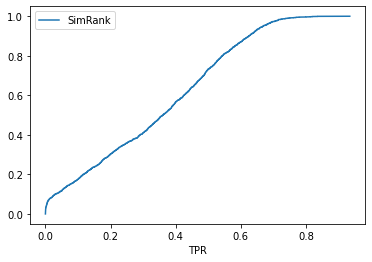

In [46]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

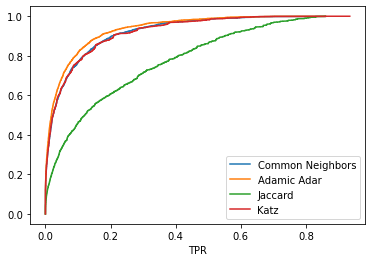

In [47]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

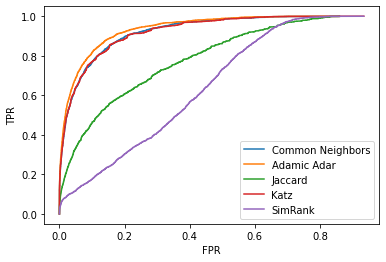

In [48]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

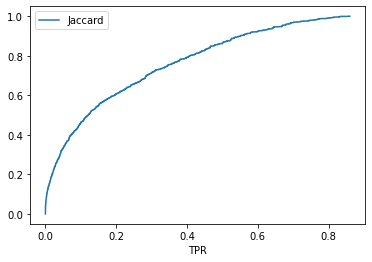

In [49]:
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

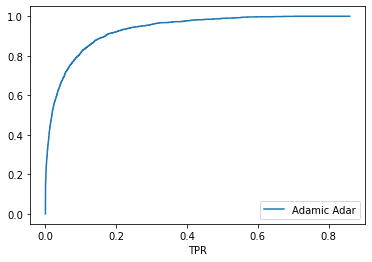

In [50]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

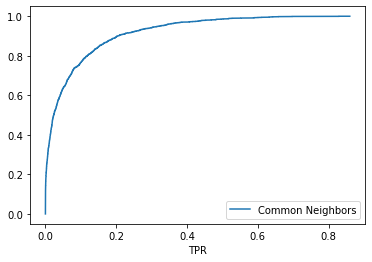

In [51]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

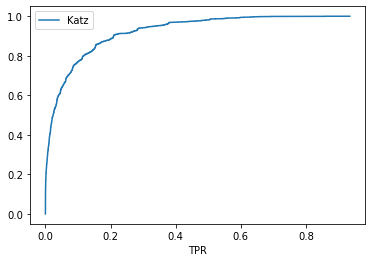

In [52]:
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [53]:
sm_evaluation.data 

array([[1.00000e+00, 0.00000e+00, 2.09000e+03, 1.28214e+05],
       [1.00000e+00, 1.00000e+00, 2.09000e+03, 1.28213e+05],
       [2.00000e+00, 1.00000e+00, 2.08900e+03, 1.28213e+05],
       ...,
       [2.09100e+03, 1.19845e+05, 0.00000e+00, 8.36900e+03],
       [2.09100e+03, 1.19846e+05, 0.00000e+00, 8.36800e+03],
       [2.09100e+03, 1.19847e+05, 0.00000e+00, 8.36700e+03]])

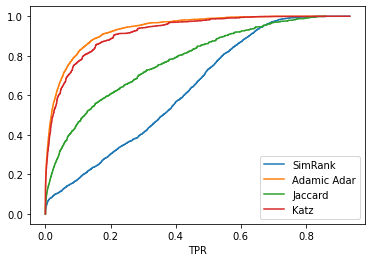

In [54]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

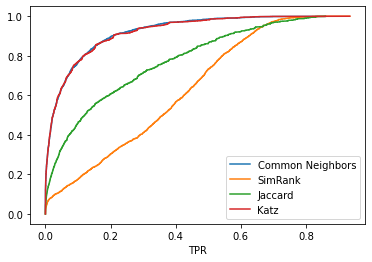

In [55]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.7872228794134735
Adamic Adar: 	 0.8000957039655209
Jaccard: 	 0.6512502631804967
SimRank: 	 0.5909837254470026
Katz:	 	 0.8608523842517387


In [57]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['fridaysforfuture', 'climatestrike', 112748],
 ['fridaysforfuture', 'climatecrisis', 92898],
 ['fridaysforfuture', 'climatechange', 90913],
 ['fridaysforfuture', 'climateaction', 90119],
 ['fridaysforfuture', 'climateemergency', 84164],
 ['fridaysforfuture', 'fridayforfuture', 75430],
 ['climatestrike', 'climatecrisis', 66456],
 ['climatestrike', 'climatechange', 65036],
 ['climatestrike', 'climateaction', 64468],
 ['gretathunberg', 'fridaysforfuture', 63520],
 ['climatestrike', 'climateemergency', 60208],
 ['fridaysforfuture', 'climate', 59550],
 ['fridaysforfuture', 'climatejustice', 58756],
 ['fridaysforfuture', 'climatestrikeonline', 58756],
 ['fridaysforfuture', 'climateactionnow', 58359],
 ['fridaysforfuture', 'fff', 57962],
 ['klimaschutz', 'fridaysforfuture', 57565],
 ['klimakrise', 'fridaysforfuture', 57168],
 ['fridaysforfuture', 'extinctionrebellion', 57168],
 ['klimastreik', 'fridaysforfuture', 55580],
 ['fridayforfuture', 'climatestrike', 53960],
 ['climatecrisis', 'clim

In [58]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [59]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [60]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: storage - life
intersezione: tellthetruth - life
intersezione: life - comicsforclimate
intersezione: life - fff
intersezione: life - climatestrikecanada
intersezione: life - kapitalismus
intersezione: life - fightclimateinjustice
intersezione: noplanetb - life
intersezione: life - deutschland
intersezione: life - greennewdeal
intersezione: life - blog
intersezione: snow - life
intersezione: life - klimanotstand
intersezione: life - endegelände
intersezione: life - bologna
intersezione: life - cdnpoli
intersezione: milano - life
intersezione: schoolstrikeforclimate - life
intersezione: life - germany
intersezione: life - earth
intersezione: umwelt - life
intersezione: trump - life
intersezione: netzstreikfuersklima - life
intersezione: tesla - life
intersezione: socialjustice - life
intersezione: parentsforfuture - life
intersezione: life - endfossilfuels
intersezione: life - covid19
intersezione: life - electricity
intersezione: oceans - life
intersezione: life -

intersezione: life - flattenthecurve
intersezione: life - followfriday
intersezione: life - goodmorningeveryone
intersezione: life - italiaviva
intersezione: life - helsinki
intersezione: life - climat
intersezione: life - codered
intersezione: life - eu
intersezione: life - coronakrise
intersezione: life - klimagerechtigkeit
intersezione: tech - life
intersezione: life - fashion
intersezione: life - environment
intersezione: life - grüne
intersezione: uprootthesystem - life
intersezione: stopcambo - life
intersezione: life - bundesregierung
intersezione: life - keingradweiter
intersezione: life - ilmastokriisi
intersezione: thursday - life
intersezione: life - hydrogen
intersezione: life - goodmorning
intersezione: life - berlin
intersezione: scientists4future - life
intersezione: life - israel
intersezione: life - australien
intersezione: life - groko
intersezione: life - globalcrisis
intersezione: strike4climate - life
intersezione: stayathome - life
intersezione: life - amazon
inte

In [61]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: storage - life
intersezione: tellthetruth - life
intersezione: life - comicsforclimate
intersezione: life - fff
intersezione: life - climatestrikecanada
intersezione: life - kapitalismus
intersezione: life - fightclimateinjustice
intersezione: noplanetb - life
intersezione: life - deutschland
intersezione: life - greennewdeal
intersezione: life - blog
intersezione: snow - life
intersezione: life - klimanotstand
intersezione: life - endegelände
intersezione: life - bologna
intersezione: life - cdnpoli
intersezione: milano - life
intersezione: schoolstrikeforclimate - life
intersezione: life - germany
intersezione: life - earth
intersezione: umwelt - life
intersezione: trump - life
intersezione: netzstreikfuersklima - life
intersezione: tesla - life
intersezione: socialjustice - life
intersezione: parentsforfuture - life
intersezione: life - endfossilfuels
intersezione: life - covid19
intersezione: life - electricity
intersezione: oceans - life
intersezione: life -

intersezione: life - energiewende
intersezione: saturdaythoughts - life
intersezione: weekendvibes - life
intersezione: twiff - life
intersezione: life - governo
intersezione: life - ff
intersezione: mantova - life
intersezione: life - engineering
intersezione: planet - life
intersezione: stopshell - life
intersezione: life - ilmastolakko
intersezione: life - extinctionrebellion
intersezione: mapa - life
intersezione: wildlife - life
intersezione: life - allefür1komma5
intersezione: life - climateactionnow
intersezione: unitebehindthescience - life
intersezione: life - beautiful
intersezione: naturalbeauty - life
intersezione: zukunft - life
intersezione: life - globalclimatejustice
intersezione: naturelovers - life
intersezione: life - bethechange
intersezione: sustainabilty - life
intersezione: lockdown - life
intersezione: savesoil - life
intersezione: life - amarone
intersezione: life - leavenoonebehind
intersezione: technology - life
intersezione: sport - life
intersezione: life -

In [62]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: storage - life
intersezione: tellthetruth - life
intersezione: life - comicsforclimate
intersezione: life - fff
intersezione: life - climatestrikecanada
intersezione: life - kapitalismus
intersezione: life - fightclimateinjustice
intersezione: noplanetb - life
intersezione: life - deutschland
intersezione: life - greennewdeal
intersezione: snow - life
intersezione: life - klimanotstand
intersezione: life - endegelände
intersezione: life - bologna
intersezione: life - cdnpoli
intersezione: milano - life
intersezione: schoolstrikeforclimate - life
intersezione: life - germany
intersezione: umwelt - life
intersezione: trump - life
intersezione: netzstreikfuersklima - life
intersezione: tesla - life
intersezione: socialjustice - life
intersezione: parentsforfuture - life
intersezione: life - endfossilfuels
intersezione: life - covid19
intersezione: life - electricity
intersezione: oceans - life
intersezione: life - hongkong
intersezione: life - greendeal
intersezione

In [63]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: stopshell - life
intersezione: life - design
intersezione: sport - life
intersezione: life - amarone
intersezione: mantova - life
intersezione: life - governo
intersezione: life - fashion
intersezione: life - italiaviva
intersezione: milano - life
intersezione: life - bologna
intersezione: life - greenfriday
intersezione: naturalbeauty - life
intersezione: life - antarctica
intersezione: life - blacklivesmatter
intersezione: zukunft - life
intersezione: life - allefür1komma5
intersezione: life - kohle
intersezione: life - 27settembre
intersezione: life - klimapaket
intersezione: thunberg - life
intersezione: life - cdu
intersezione: life - köln
intersezione: life - klimakatastrophe
intersezione: life - klimaschutzgesetz
intersezione: life - gruenen
intersezione: life - groko
intersezione: life - australien
intersezione: life - bundesregierung
intersezione: life - grüne
intersezione: neubauer - life
intersezione: life - allefuersklima
intersezione: trump - life
in

In [64]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [65]:
len(int_final)

179

In [66]:
int_final

[Pair('storage', 'life'),
 Pair('tellthetruth', 'life'),
 Pair('life', 'comicsforclimate'),
 Pair('life', 'fff'),
 Pair('life', 'climatestrikecanada'),
 Pair('life', 'kapitalismus'),
 Pair('life', 'fightclimateinjustice'),
 Pair('noplanetb', 'life'),
 Pair('life', 'deutschland'),
 Pair('life', 'greennewdeal'),
 Pair('snow', 'life'),
 Pair('life', 'klimanotstand'),
 Pair('life', 'endegelände'),
 Pair('life', 'bologna'),
 Pair('life', 'cdnpoli'),
 Pair('milano', 'life'),
 Pair('schoolstrikeforclimate', 'life'),
 Pair('life', 'germany'),
 Pair('umwelt', 'life'),
 Pair('trump', 'life'),
 Pair('netzstreikfuersklima', 'life'),
 Pair('tesla', 'life'),
 Pair('socialjustice', 'life'),
 Pair('parentsforfuture', 'life'),
 Pair('life', 'endfossilfuels'),
 Pair('life', 'covid19'),
 Pair('life', 'electricity'),
 Pair('oceans', 'life'),
 Pair('life', 'hongkong'),
 Pair('life', 'greendeal'),
 Pair('life', 'endcoal'),
 Pair('life', 'klimaat'),
 Pair('tree', 'life'),
 Pair('life', 'laschet'),
 Pair('lif